$y'' - ay = - sin(x)$

s.t. 

$y(0) = 0$

$y(\pi) = 0$

Заранее известное решение:

$y = \frac{sin(x)}{a+1}$

In [356]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
def f(x):
    return np.sin(x)
def real_sol(x):
    return np.sin(x)/(a+1)

In [357]:
def fem(N = 100, a = 1):
    x = np.linspace(0, np.pi, N+1)
    h = x[1] - x[0]

    def b_i_fun(i = 0):
        # return 1/6 * (-6 + a*(x[i] - x[i - 1])^2) * (x[i] - x[i - 1]) / h^2
        return (a * h**2 - 6) / (6 * h)

    def phi_i_fun(i = 0):
        # return 1/3 * (3 + a*(x[i] - x[i - 1])^2) * (x[i] - x[i - 1]) / h^2 + 1/3 * (3 + a*(x[i + 1] - x[i])^2) * (x[i + 1] - x[i]) / h^2
        return (2 * a * h**2 + 6) / (3 * h)

    def f_phi_i_A(i):
        return ((x[i-1] - x[i]) * np.cos(x[i]) - np.sin(x[i-1]) + np.sin(x[i])) / h + ((x[i+1] - x[i]) * np.cos(x[i]) + np.sin(x[i]) - np.sin(x[i+1])) / h
    

    b_i = b_i_fun()
    phi_i = phi_i_fun()

    mtr = np.diag([phi_i for i in range(1, N)])
    for i in range(N - 2):
        mtr[i][i+1] = b_i
        mtr[i+1][i] = b_i

    target = np.array([f_phi_i_A(i) for i in range(1, N)])

    y = np.concatenate(([0], np.linalg.solve(mtr, target), [0]))

    def my_fun(pt):
        ind = int(pt * N / np.pi + 1e-7)
        return (x[ind+1] - pt) / h * y[ind] + (pt - x[ind]) / h * y[ind+1]
    
    fem_res = np.concatenate(([0], [my_fun(x) for x in np.linspace(0, np.pi, N)[1:-1]], [0]))
    return fem_res


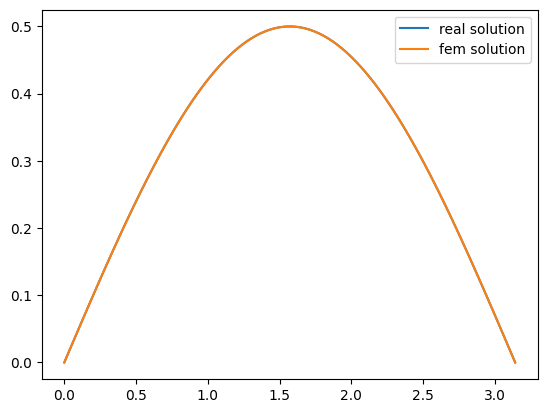

In [358]:
N = 100

xs = np.linspace(0, np.pi, N)

real_solution = [real_sol(x) for x in xs]
fem_solution = fem(N)

plt.plot(xs, real_solution, label='real solution')
plt.plot(xs, fem_solution, label='fem solution')
plt.legend()
plt.show()